##Mounting Google Drive

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Importing Datasets

In [5]:
RA = pd.read_excel('/content/drive/MyDrive/newsDataset/RAFULL.xlsx')
TFKNFK = pd.read_excel('/content/drive/MyDrive/newsDataset/TFK+NFK.xlsx')
DN = pd.read_excel('/content/drive/MyDrive/newsDataset/DNFULL.xlsx')
SNFS = pd.read_csv('/content/drive/MyDrive/newsDataset/SNFSFULL.csv')

##Data preprocessing

In [6]:
RA = RA.drop(['category'], axis = 1)
DN = DN.drop(['category'], axis = 1)
SNFS = SNFS.drop(['category'], axis = 1)
TFKNFK  = TFKNFK.drop(['created_time'], axis = 1)

In [ ]:
RA.head()

In [ ]:
DN.head()

In [ ]:
SNFS.head()

In [ ]:
TFKNFK.head()

In [7]:
TFKNFK = TFKNFK[['name', 'url', 'article', 'title']]

In [8]:
frames1 = [RA,SNFS]
dataset2 = pd.concat(frames1)
frames2 = [TFKNFK,DN]
dataset3 = pd.concat(frames2)
frames = [dataset2,dataset3]
dataset1 = pd.concat(frames)

In [ ]:
dataset1

name                                                url  \
0      ROBINAGE  https://www.robinage.com/books--nooks/smash-it...   
1      ROBINAGE  https://www.robinage.com/books--nooks/bringing...   
2      ROBINAGE  https://www.robinage.com/books--nooks/the-bour...   
3      ROBINAGE  https://www.robinage.com/books--nooks/what-the...   
4      ROBINAGE  https://www.robinage.com/books--nooks/nida-fin...   
...         ...                                                ...   
6653  DOGO News  https://www.dogonews.com/2007/11/26/a-warning-...   
6654  DOGO News  https://www.dogonews.com/2007/11/16/multiplica...   
6655  DOGO News  https://www.dogonews.com/2007/11/12/learn-the-...   
6656  DOGO News  https://www.dogonews.com/2007/11/5/not-sure-wh...   
6657  DOGO News  https://www.dogonews.com/2007/10/23/trouble-th...   

                                                  title  \
0                              Smash It, Butterfingers!   
1                                 Bringing Back Grandpa   
2     The Bournvita Quiz Contest Collectorâs Editi...   
3                              Whatâs the Big Secret?   
4                                      Nida Finds a Way   
...                                                 ...   
6653            A Warning for All You Harry Potter Fans   
6654      Multiplication tricks for numbers close to 10   
6655  Learn The Nines Multiplication Table in Less T...   
6656       Not Sure What Kind Of Dog You Want? Rent It!   
6657          Trouble â€“ The Twelve Million Dollar Dog   

                                                article  kidFriendly  
0     The seventh book in the Butterfingers series, ...            1  
1     This book is the sequel to âFlying With Gran...            1  
2     The âBournvita Quiz Contestâ started as a ...            1  
3     This 14-page book is about the changes that ta...            1  
4     How many times have you been told âNOâ for...            1  
...                                                 ...          ...  
6653  Photo Credit: YouTube  All you Harry Potter fa...            1  
6654  Last week, we brought you a fun way to figure ...            1  
6655  Want to impress your teacher with your multipl...            1  
6656  Seriously, you can do this now! If you are not...            1  
6657  Leona Helmsley (Photo Credit: By United States...            1  

[16786 rows x 5 columns]

In [9]:
dataset1['kidFriendly'] = pd.Series([1 for x in range(len(dataset1.index))])

In [10]:
dataset2 = pd.read_csv('/content/drive/MyDrive/newsDataset/articles1.csv')

In [11]:
import random
random.seed(10)

In [12]:
dataset1 = dataset1.sample(n = 3500)

In [13]:
column_values = dataset1[["name"]].values
unique_values =  np.unique(column_values)

In [14]:
unique_values

array(['DOGO News', 'News for kids', 'ROBINAGE',
       'Science News for Students', 'Time for Kids'], dtype=object)

In [15]:
dataset2 = dataset2.sample(n = 3500)

In [ ]:
dataset2.head()

In [ ]:
dataset2.info()

In [16]:
dataset2 = dataset2.drop(['Unnamed: 0'],axis = 1)
dataset2 = dataset2.drop(['id'],axis = 1)
dataset2 = dataset2.drop(['author'],axis = 1)
dataset2 = dataset2.drop(['date'],axis = 1)
dataset2 = dataset2.drop(['year'],axis = 1)
dataset2 = dataset2.drop(['month'],axis = 1)

In [17]:
dataset2 = dataset2[['publication', 'url', 'content', 'title']]

In [18]:
dataset2 = dataset2.rename(columns={"publication": "name", "content": "article"})

In [19]:
dataset2['kidFriendly'] = 0

In [20]:
dataset2['url'] = "Not Found"

In [21]:
frames = [dataset1,dataset2]
dataset = pd.concat(frames)

In [23]:
dataset

name  \
413                    DOGO News   
886                     ROBINAGE   
914                     ROBINAGE   
953                     ROBINAGE   
1399   Science News for Students   
...                          ...   
28160                  Breitbart   
47803           Business Insider   
28662                  Breitbart   
12629                  Breitbart   
25425                  Breitbart   

                                                     url  \
413    https://www.dogonews.com/2018/11/28/these-amaz...   
886     https://www.robinage.com/books--nooks/plants.htm   
914    https://www.robinage.com/books--nooks/the-demo...   
953    https://www.robinage.com/books--nooks/keeper-o...   
1399   https://www.sciencenewsforstudents.org/article...   
...                                                  ...   
28160                                          Not Found   
47803                                          Not Found   
28662                                          Not Found   
12629                                          Not Found   
25425                                          Not Found   

                                                   title  \
413    These Amazing "Robotic Skins" Can Bring Your T...   
886                                               Plants   
914                  The Demon Trappers Series: Forgiven   
953                                  Keeper of the Doves   
1399       Restaurant diners may ingest extra pollutants   
...                                                  ...   
28160  Lebanese Crime Clans Turn German Neighbourhood...   
47803  The latest Republican convention disaster show...   
28662  Detroit Pistons Coach Stan Van Gundy: ‘We Just...   
12629    Mexican National Found Guilty of Illegal Voting   
25425  DiCaprio Got ’Terrifying’ Up-Close Look at Cli...   

                                                 article  kidFriendly  
413    Robotic skin can transform your stuffed toys i...            1  
886    Part of the Young Discoverer Series informing ...            1  
914    Riley Blackthorne is in a fix. She has to save...            1  
953    This is a simple story of the McBee family dur...            1  
1399   Dining out may boost exposure to certain poten...            1  
...                                                  ...          ...  
28160  While the Interior Ministry denies even the ex...            0  
47803  ’  ’ ”   As Benjy Sarlin of MSNBC  Wednesday n...            0  
28662  In advance of Wednesday night’s game against t...            0  
12629  A Texas jury convicted a Mexican national for ...            0  
25425  Leonardo DiCaprio got a “terrifying”   look at...            0  

[7000 rows x 5 columns]

In [22]:
dataset = dataset.sample(frac = 1)

In [ ]:
import gc
gc.collect()

217

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 18360 to 2785
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         7000 non-null   object
 1   url          7000 non-null   object
 2   title        6995 non-null   object
 3   article      7000 non-null   object
 4   kidFriendly  7000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 328.1+ KB


In [23]:
dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         7000 non-null   object
 1   url          7000 non-null   object
 2   title        6995 non-null   object
 3   article      7000 non-null   object
 4   kidFriendly  7000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 273.6+ KB


In [38]:
dataset.to_csv('NewsDatasetFinal.csv')

In [24]:
import random
random.seed(10)

##Stop word removal and stemming:

In [25]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

for i in range(0, 7000):
 text = re.sub('[^a-zA-Z]',' ',str(dataset['article'][i]))
 text = text.lower()
 text = text.split()
 ps = PorterStemmer()
 text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
 text = ' '.join(text)
 corpus.append(text)
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus

##Bag of words

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X1 = cv.fit_transform(corpus).toarray()
y1 = dataset.iloc[:, 4].values

In [61]:
X1.shape

(7000, 51684)

##Tf-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidf = TfidfVectorizer()
X2 = tfidf.fit_transform(corpus).toarray()
y2 = dataset.iloc[:, 4].values

##TF-IDF with unigrams and bigrams

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',min_df = 0.05, max_df = 0.6, ngram_range = (1, 3))
X3 = tfidf.fit_transform(corpus).toarray()
y3 = dataset.iloc[:, 4].values

##PCA for data visualization

In [33]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 4].values
X = sc.fit_transform(X)
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

##Data plotting

Text(0.5, 0, 'PC3')

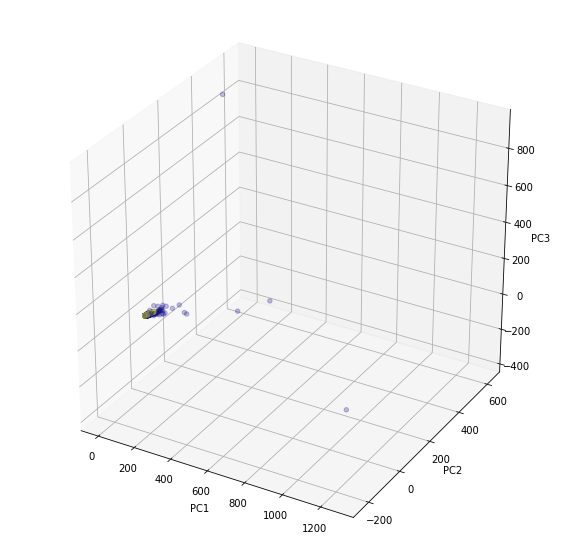

In [96]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
axis.scatter(X[:,0],X[:,1],X[:,2],c = y[:],cmap='plasma',alpha=0.25)
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

##Splitting training and test data

In [62]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 =train_test_split(X1, y1, test_size=0.20, random_state=0)

X_train2,X_test2,y_train2,y_test2 =train_test_split(X2, y2, test_size=0.20, random_state=0)

X_train3,X_test3,y_train3,y_test3 =train_test_split(X3, y3, test_size=0.20, random_state=0)

##Implementing necessary libraries for classification

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

##Function for running models and calculating performance

In [65]:
def display_metrics_micro(Ytest, Ypred):
    print('Confusion Matrix:',confusion_matrix(Ytest, Ypred))
    accuracy.append(accuracy_score(Ytest, Ypred))
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred))
    precision.append(precision_score(Ytest, Ypred))
    print('Precision score: Micro', precision_score(Ytest, Ypred))
    recall.append(recall_score(Ytest, Ypred))
    print('Recall score: Micro', recall_score(Ytest, Ypred))

def build_model_train(X_train, y_train, model='lr'):
    if model == 'lr':
        model = LogisticRegression(random_state=0)
       

    elif model == 'svm':
        model = LinearSVC(random_state=0)
        
      
    elif model == 'nbayes':
        model = GaussianNB()
        
        
    elif model == 'dt':
       model = DecisionTreeClassifier(criterion='entropy',random_state=0)
       
      
    elif model == 'rf':
        model = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
        
        
    elif model == 'knn':
        model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
        
    return model

models = ['lr', 'svm', 'nbayes','dt','rf','knn']


##Fitting the Bag-of-Words model 

In [68]:
accuracy = []
precision = []
recall = []
for model in models:
    model1 = build_model_train(X_train1, y_train1, model=model)
    model1.fit(X_train1, y_train1)
    y_pred1 = model1.predict(X_test1)
    print("\n")
    print(f"**Displaying  metrics for the model {model} after performing bag of words model\n")
    display_metrics_micro(y_test1, y_pred1)



**Displaying  metrics for the model lr after performing bag of words model

Confusion Matrix: [[663  24]
 [ 20 693]]
Accuracy score:  0.9685714285714285
F1 score: Micro 0.9692307692307692
Precision score: Micro 0.9665271966527197
Recall score: Micro 0.9719495091164095


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,




**Displaying  metrics for the model svm after performing bag of words model

Confusion Matrix: [[658  29]
 [ 31 682]]
Accuracy score:  0.9571428571428572
F1 score: Micro 0.9578651685393259
Precision score: Micro 0.9592123769338959
Recall score: Micro 0.9565217391304348


**Displaying  metrics for the model nbayes after performing bag of words model

Confusion Matrix: [[614  73]
 [ 83 630]]
Accuracy score:  0.8885714285714286
F1 score: Micro 0.8898305084745762
Precision score: Micro 0.8961593172119487
Recall score: Micro 0.8835904628330996


**Displaying  metrics for the model dt after performing bag of words model

Confusion Matrix: [[652  35]
 [ 43 670]]
Accuracy score:  0.9442857142857143
F1 score: Micro 0.9449929478138223
Precision score: Micro 0.950354609929078
Recall score: Micro 0.9396914446002805


**Displaying  metrics for the model rf after performing bag of words model

Confusion Matrix: [[666  21]
 [ 66 647]]
Accuracy score:  0.9378571428571428
F1 score: Micro 0.9370021723

##Fitting the TF-IDF model

In [86]:
accuracy = []
precision = []
recall = []
for model in models:
    model2 = build_model_train(X_train2, y_train2, model=model)
    model2.fit(X_train2, y_train2)
    y_pred2 = model2.predict(X_test2)
    print("\n")
    print(f"**Displaying  metrics for the model {model} after performing TF IDF\n")
    display_metrics_micro(y_test2, y_pred2)



**Displaying  metrics for the model lr after performing TF IDF

Confusion Matrix: [[654  33]
 [ 16 697]]
Accuracy score:  0.965
F1 score: Micro 0.966042966042966
Precision score: Micro 0.9547945205479452
Recall score: Micro 0.9775596072931276


**Displaying  metrics for the model svm after performing TF IDF

Confusion Matrix: [[662  25]
 [  6 707]]
Accuracy score:  0.9778571428571429
F1 score: Micro 0.9785467128027682
Precision score: Micro 0.9658469945355191
Recall score: Micro 0.9915848527349228


**Displaying  metrics for the model nbayes after performing TF IDF

Confusion Matrix: [[618  69]
 [ 94 619]]
Accuracy score:  0.8835714285714286
F1 score: Micro 0.8836545324768023
Precision score: Micro 0.8997093023255814
Recall score: Micro 0.8681626928471248


**Displaying  metrics for the model dt after performing TF IDF

Confusion Matrix: [[640  47]
 [ 57 656]]
Accuracy score:  0.9257142857142857
F1 score: Micro 0.9265536723163842
Precision score: Micro 0.9331436699857752
Recall score

##Fitting the N-Gram  model

In [90]:
accuracy = []
precision = []
recall = []
for model in models:
    model3 = build_model_train(X_train3, y_train3, model=model)
    model3.fit(X_train3, y_train3)
    y_pred3 = model3.predict(X_test3)
    print("\n")
    print(f"**3. displaying  metrics for the model {model}\n")
    display_metrics_micro(y_test3, y_pred3)



**3. displaying  metrics for the model lr

Confusion Matrix: [[660  27]
 [ 17 696]]
Accuracy score:  0.9685714285714285
F1 score: Micro 0.9693593314763232
Precision score: Micro 0.9626556016597511
Recall score: Micro 0.9761570827489481


**3. displaying  metrics for the model svm

Confusion Matrix: [[664  23]
 [ 14 699]]
Accuracy score:  0.9735714285714285
F1 score: Micro 0.9742160278745644
Precision score: Micro 0.9681440443213296
Recall score: Micro 0.9803646563814866


**3. displaying  metrics for the model nbayes

Confusion Matrix: [[668  19]
 [132 581]]
Accuracy score:  0.8921428571428571
F1 score: Micro 0.8849961919268851
Precision score: Micro 0.9683333333333334
Recall score: Micro 0.814866760168303


**3. displaying  metrics for the model dt

Confusion Matrix: [[634  53]
 [ 41 672]]
Accuracy score:  0.9328571428571428
F1 score: Micro 0.9346314325452016
Precision score: Micro 0.926896551724138
Recall score: Micro 0.9424964936886395


**3. displaying  metrics for the model rf



##Accuracy plotting

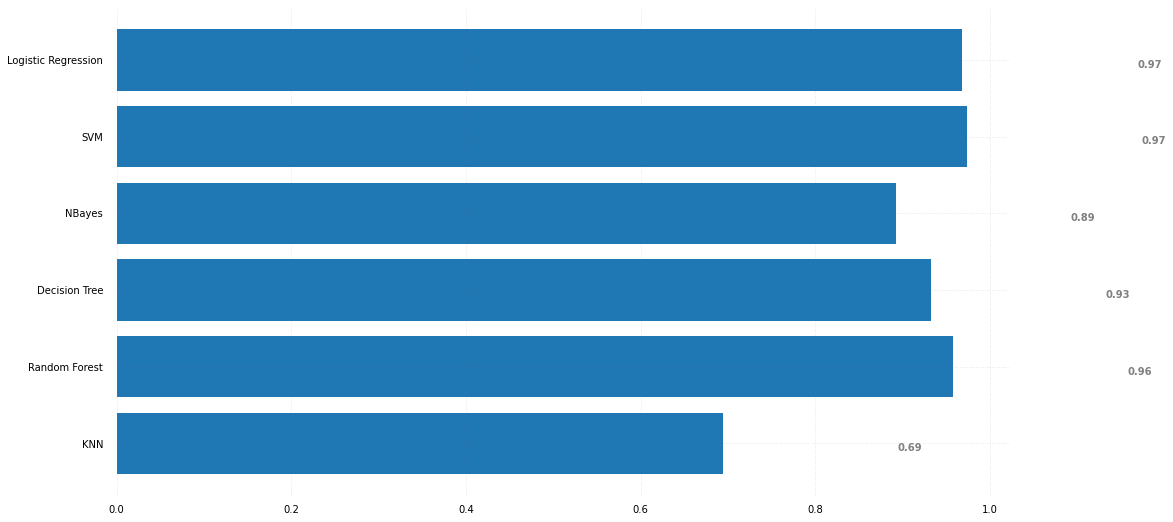

In [91]:
import pandas as pd
from matplotlib import pyplot as plt
 
name = ['Logistic Regression','SVM','NBayes','Decision Tree','Random Forest','KNN'] 
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, accuracy)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Show Plot
plt.show()

##Recall plotting

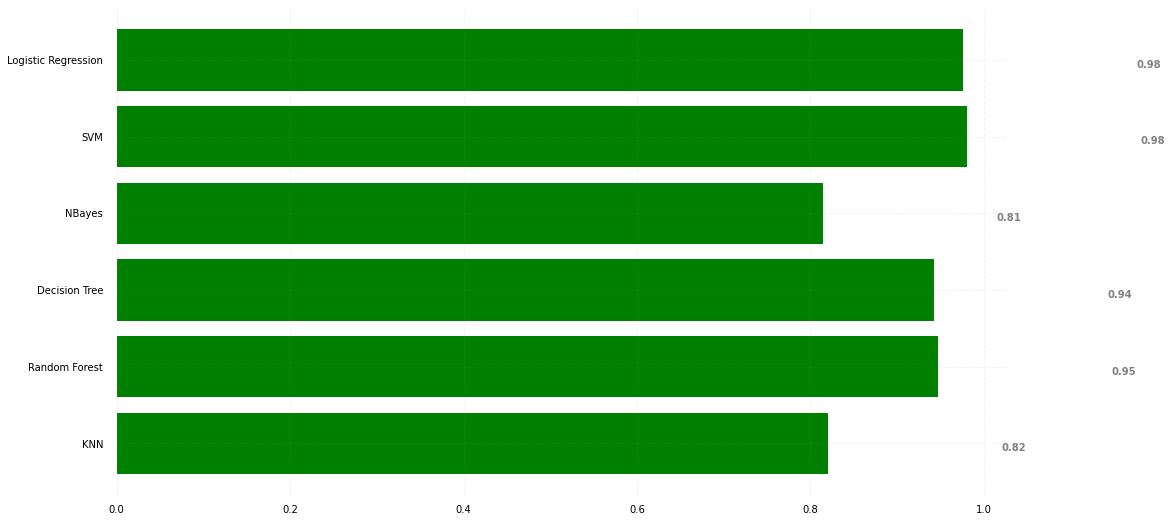

In [93]:
import pandas as pd
from matplotlib import pyplot as plt
 
name = ['Logistic Regression','SVM','NBayes','Decision Tree','Random Forest','KNN'] 
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, recall,color = "green")
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Show Plot
plt.show()

##Precision plotting

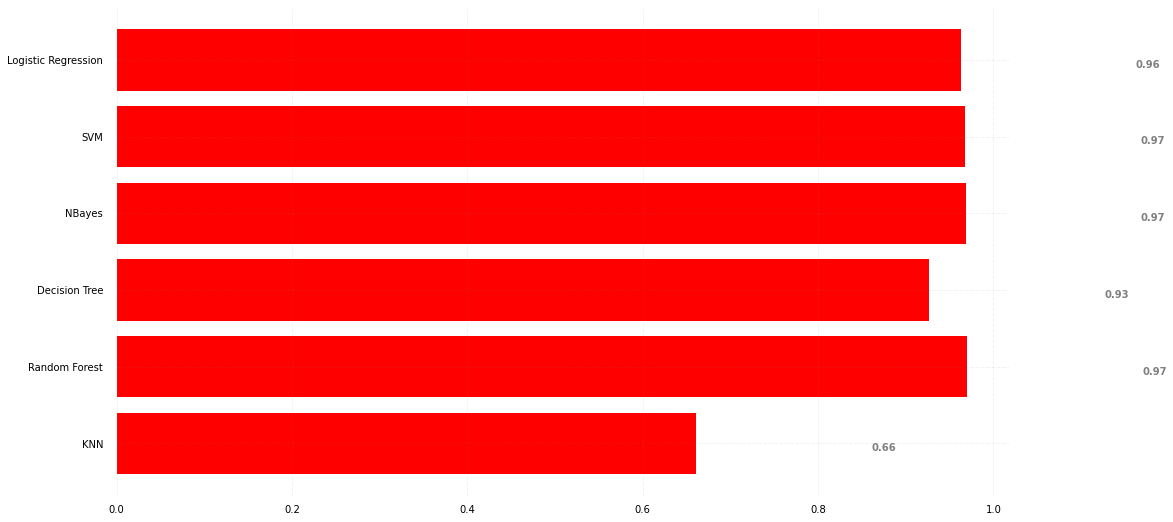

In [94]:
import pandas as pd
from matplotlib import pyplot as plt
 
name = ['Logistic Regression','SVM','NBayes','Decision Tree','Random Forest','KNN'] 
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, precision,color = "red")
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Show Plot
plt.show()